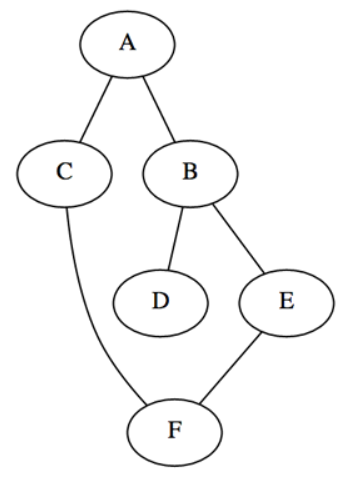

In [2]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [9]:
def bfs(graph, start):
    """iterative implementation"""
    visited, queue = set(), [start]
    order_visited = []
    while queue:
        vertex = queue.pop(0) #remove visited node from queue
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
            print('Adjacent nodes in queue: ' + str(queue))
        order_visited.append(str(vertex))
    print('\n')
    print('Order visited: ' + str(order_visited))
    return visited

bfs(graph, 'A')

Adjacent nodes in queue: ['B', 'C']
Adjacent nodes in queue: ['C', 'E', 'D']
Adjacent nodes in queue: ['E', 'D', 'F']
Adjacent nodes in queue: ['D', 'F', 'F']
Adjacent nodes in queue: ['F', 'F']
Adjacent nodes in queue: ['F']


Order visited: ['A', 'B', 'C', 'E', 'D', 'F', 'F']


{'A', 'B', 'C', 'D', 'E', 'F'}

In [10]:
def bfs_paths(graph, start, goal): 
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

list(bfs_paths(graph, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

In [11]:
def shortest_path(graph, start, goal):
    try:
        return next(bfs_paths(graph, start, goal)) #shortest path from bfs_paths function will always be returned first
    except StopIteration:
        return None

shortest_path(graph, 'A', 'F')

['A', 'C', 'F']